# SPTcl-IRAGN Mock Catalog Corner Plot
## Author: Benjamin Floyd

Creates a publication quality corner plot using one of the mock catalog mcmc chains

In [1]:
import h5py
import emcee
import re
import numpy as np
import matplotlib.pyplot as plt
from pygtc import plotGTC
import corner

%matplotlib inline
plt.rcParams.update({'font.size': 14})
param_pattern = re.compile(r'(?:[tezbCx]|rc)(-*\d+.\d+|\d+)')

In [2]:
# Read in the chain that we want
file_name = 'Data_Repository/Project_Data/SPT-IRAGN/MCMC/Mock_Catalog/Chains/Port_Rebuild_Tests/eta-zeta_grid/emcee_chains_eta-zeta_grid_308cl_snr13.h5'
with h5py.File(file_name, 'r') as f:
    chain_names = list(f.keys())
chain_names = [chain_name for chain_name in chain_names if 'e4.00_z-1.00' in chain_name]
chain_name = 'mock_AGN_catalog_t1.102_e4.00_z-1.00_b1.00_rc0.100_C0.158_eta_zeta_grid_308cl_snr13'

sampler = emcee.backends.HDFBackend(filename=file_name, name=chain_name)

In [3]:
# Get the dimensions of the chain
nsteps, nwalkers, ndim = sampler.get_chain().shape

# Get the autocorrelation time for determining the burn-in
try:
    tau_est = sampler.get_autocorr_time()
    tau = np.mean(tau_est)

    burnin = int(3 * tau)
except emcee.autocorr.AutocorrError:
    tau_est = sampler.get_autocorr_time(quiet=True)
    tau = np.mean(tau_est)

    burnin = int(nsteps // 3)

flat_samples = sampler.get_chain(discard=burnin, thin=1, flat=True)

# exponentiate the log-sampled parameters
flat_samples[:, 0] = np.exp(flat_samples[:, 0])
flat_samples[:, 4] = np.exp(flat_samples[:, 4])
flat_samples[:, 5] = np.exp(flat_samples[:, 5])

The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 100;
tau: [251.50208144  99.10088482 208.8911073   52.66453527  46.87147045
  42.71278889]


In [4]:
# Parameter names
labels = [r'$\theta$', r'$\eta$', r'$\zeta$', r'$\beta$', r'$r_c$', r'$C_0$']

# True values
truths = np.array(param_pattern.findall(chain_name), dtype=float)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


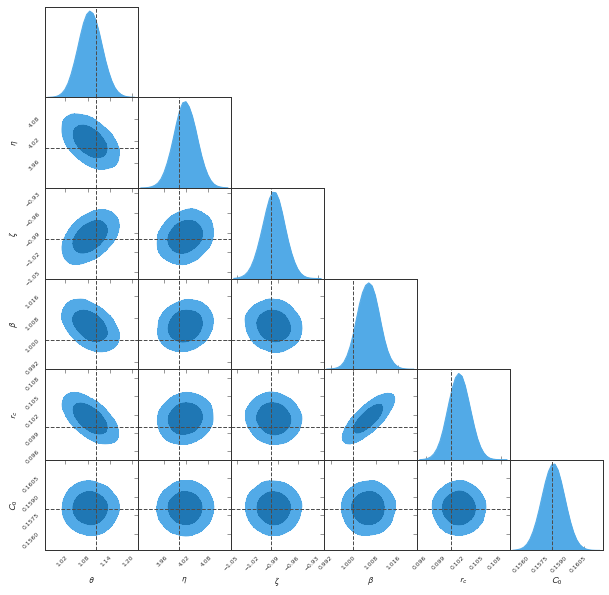

In [5]:
fig = plotGTC(chains=flat_samples, paramNames=labels, truths=truths, figureSize=10)

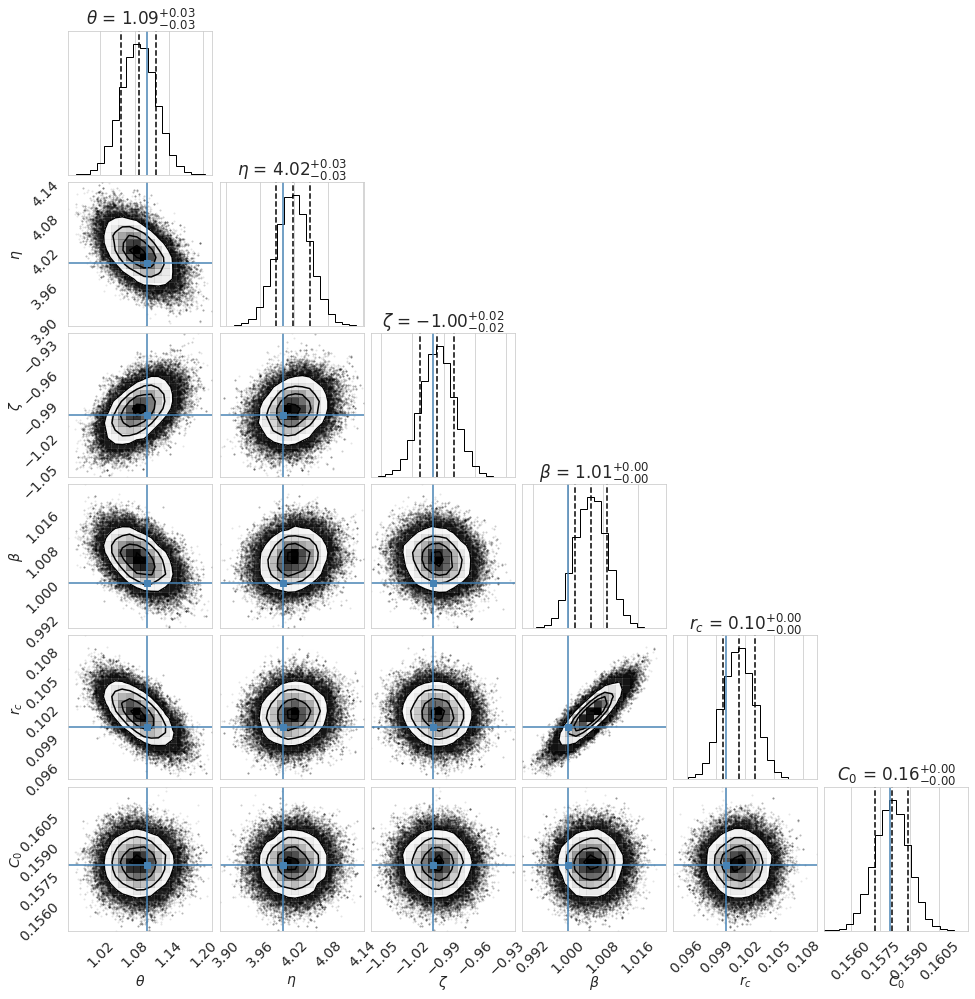

In [6]:
fig2 = corner.corner(flat_samples, show_titles=True, labels=labels, truths=truths, quantiles=[0.16, 0.5, 0.84])